In [1]:
# IMPORTS
import cvxpy as cp
import numpy as np
import numpy.linalg
import numpy.matlib
from numpy.linalg import norm
import algorithms.trend_filter_derivative_pkg as tfilter
from scipy import interpolate
from scipy import signal
import csv   
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# LOAD DATA

# 1) LOAD DYNAMICS AND TIME ARRAYS

filepath = 'data_files/Lorenz63_dynamics.csv'
dynamics = np.genfromtxt(filepath, delimiter=',')

t = dynamics[0]
data = dynamics[1:]
n_states = int(data.shape[0] / 2)
DX = data[n_states:]
t_samples = len(t)


# 2) LOAD OBSERVATION SAMPLES
Y_samples = []
noise_lvl = '0.001'

for state in range(n_states):
    
    filepath = 'data_files/Lorenz63_samples_noise_' + noise_lvl +'_Y'+ str(state+1) + '.csv'
    y = np.genfromtxt(filepath, delimiter=',')
        
    Y_samples.append(y)
    
n_samples = Y_samples[0].shape[0]

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.44957690005089, tolerance: 3.2925309541140635
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.48137852969205, tolerance: 3.2925309541140635
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.52237991904926, tolerance: 3.2925309541140635
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want t

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.3979565735842, tolerance: 3.2925309541140635
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.23180841691651, tolerance: 3.2925309541140635
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.23831391637006, tolerance: 3.2925309541140635
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425.2236230538574, tolerance: 3.2925309541140635
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434.35816784146164, tolerance: 3.2925309541140635
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474.556538219897, tolerance: 3.2925309541140635
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to i

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417.39079168134845, tolerance: 2.104705090629844
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417.7163301311402, tolerance: 2.104705090629844
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417.9783171810577, tolerance: 2.104705090629844
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to inc

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 583.6888026519845, tolerance: 2.104705090629844
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229.742790679322, tolerance: 2.104705090629844
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 605.3068692193954, tolerance: 2.104705090629844
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to incre

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458.0842303081867, tolerance: 2.2415575870226485
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458.9739354894478, tolerance: 2.2415575870226485
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458.5620293358719, tolerance: 2.2415575870226485
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to i

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 522.8000714474581, tolerance: 2.2415575870226485
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 528.4903799343365, tolerance: 2.2415575870226485
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 534.6181790726275, tolerance: 2.2415575870226485
  positive)
/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to i

/home/alexandre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.40537984734726, tolerance: 2.2415575870226485
  positive)


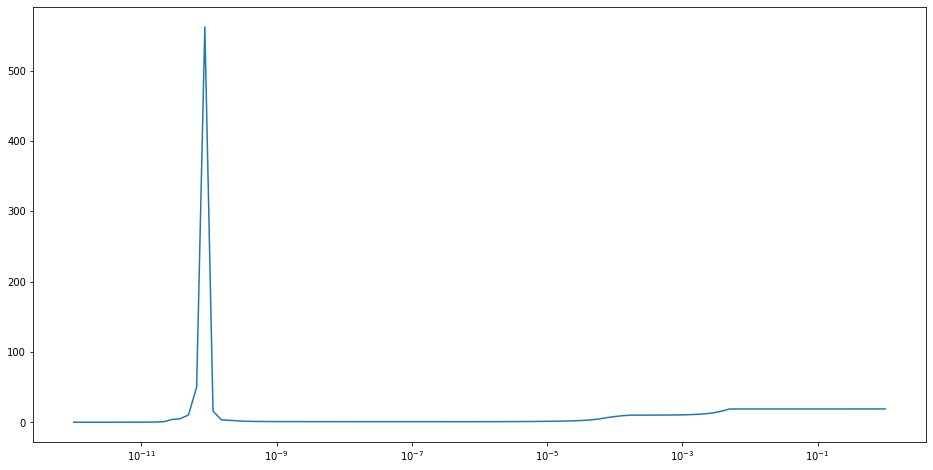

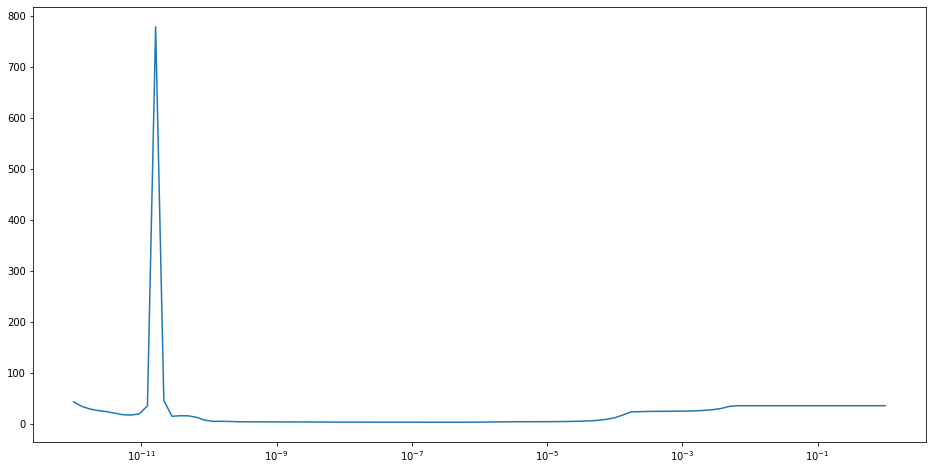

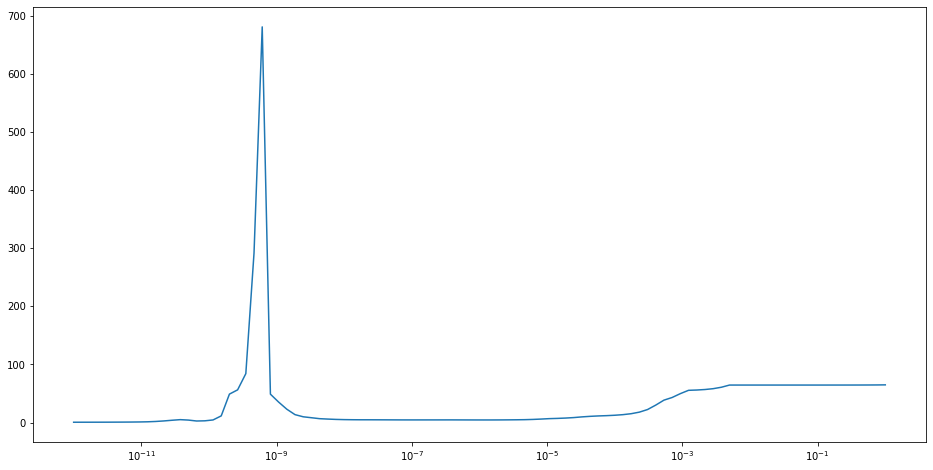

In [3]:
################### DENOISING AND NUMERICAL DIFFERENTIATION - SMOOTHING SPLINES ###################
DY_tf = np.zeros((t_samples, n_states))
error_dX = np.zeros((n_samples,n_states))
trim = int(np.floor(5 / 100 * t_samples))


for sample in range(1):
    #CVX code
    for state in range(n_states):
        
        y = Y_samples[state][sample,:]

        #Find corner point
        tf = tfilter.gcv(y, t, order = 3, lambda_min = 1e-12, lambda_max = 1)
        dy_tf = tf[0]
        lambdas, gcv = tf[1]
        plt.figure(figsize = (16,8))
        plt.semilogx(lambdas, gcv)
        
        #Remove ends
        DYhat_tf = dy_tf[trim:-trim]
        #Compute errors
        error_dX[sample,state] = norm(DYhat_tf - DX[state,trim:-trim]) / norm(DX[state,trim:-trim])

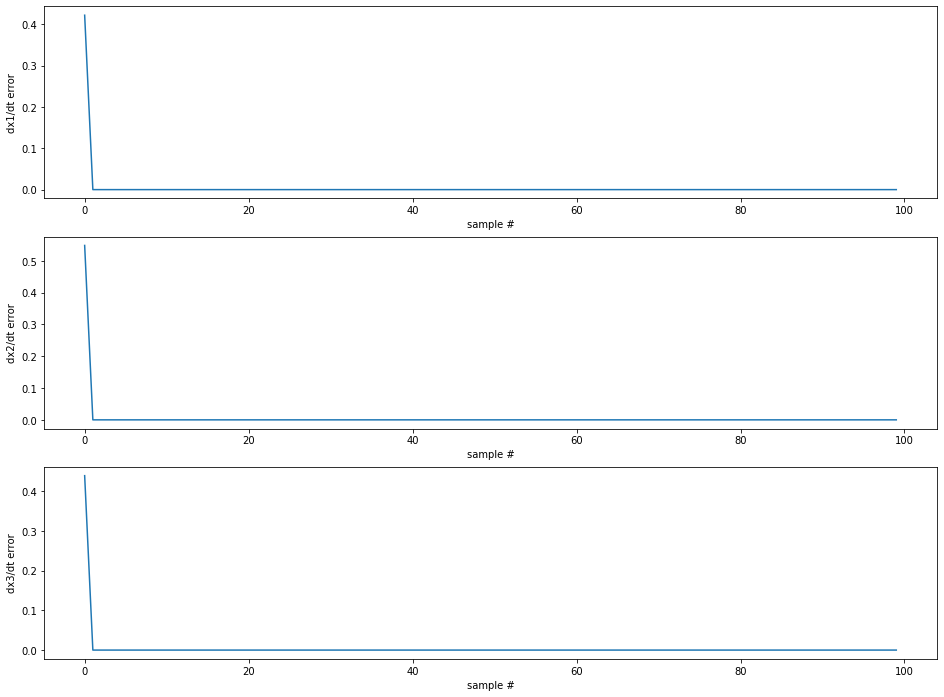

In [5]:
fig, ax = plt.subplots(n_states,1, figsize = (16,12))

for state in range(n_states):
    ax[state].plot(error_dX[:,state])
    ax[state].set_ylabel(f'dx{state+1}/dt error')
    ax[state].set_xlabel('sample #')

In [ ]:
mean_dX_error = np.zeros(n_states)
var_dX_error = np.zeros(n_states)

ind_names = []
col_names = ['mean error dx', 'var. error dx']

for state in range(n_states):
    mean_dX_error[state] = error_dX[:,state].mean()
    var_dX_error[state] = error_dX[:,state].var()
    ind_names.extend(['state x' + str(state+1)])
    

In [ ]:
errors = pd.DataFrame(np.array([mean_dX_error, var_dX_error]).T, index = ind_names, columns=col_names)
errors